# Solution

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("../data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("../data/asl_data/sign_mnist_test.csv")

## Exploring the Data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_df['label'].max()

23

In [5]:
train_df['label'].min()

0

In [6]:
valid_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
valid_df['label'].max()

24

In [8]:
valid_df['label'].min()

0

In [9]:
train_df['label'].value_counts().sort_index()

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
9     1114
10    1241
11    1055
12    1151
13    1196
14    1088
15    1279
16    1294
17    1199
18    1186
19    1161
20    1082
21    1225
22    1164
23    1118
Name: label, dtype: int64

In [10]:
valid_df['label'].value_counts().sort_index()

0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
10    331
11    209
12    394
13    291
14    246
15    347
16    164
17    144
18    246
19    248
20    266
21    346
22    206
23    267
24    332
Name: label, dtype: int64

## Fixing the validation dataset

In [11]:
valid_df['label'] = valid_df['label'].where(valid_df['label'] <10,(valid_df.label -1))

> The signature for [DataFrame.where()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html) differs from numpy.where(). Roughly df1.where(m, df2) is equivalent to np.where(m, df1, df2).

In [12]:
valid_df['label'].value_counts().sort_index()

0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
9     331
10    209
11    394
12    291
13    246
14    347
15    164
16    144
17    246
18    248
19    266
20    346
21    206
22    267
23    332
Name: label, dtype: int64

In [13]:
valid_df.label.max()

23

In [14]:
valid_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [15]:
valid_df.to_csv('../data/asl_data/sign_mnist_valid.csv', index = False)

### Remove label from the data frame

As you can see, in the **training** and **validation** data are contained the **labels**, so it is necessary to storage them in the `y_train` and ``y_valid` variables and remove them from the data frame.

In [16]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### Extract the values

In [17]:
x_train = train_df.values
x_valid = valid_df.values

### Data summary

In [18]:
print(f"{x_train.shape[0]} images with {x_train.shape[1]} pixels each for training")

27455 images with 784 pixels each for training


In [19]:
print(f"{y_train.shape[0]} labels")

27455 labels


In [20]:
print(f"For validation, we have {x_valid.shape[0]} images")

For validation, we have 7172 images


In [21]:
print(f"And {y_valid.shape[0]} labels")

And 7172 labels


## Visualizing the Data

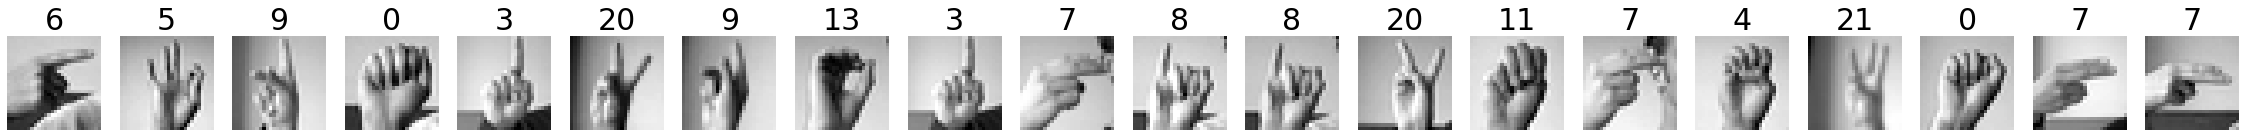

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_valid[i]
    label = y_valid[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Normalization

In [23]:
x_train.min()

0

In [24]:
x_train.max()

255

In [25]:
x_train = x_train / 255
x_valid = x_valid / 255

In [26]:
y_train.max()

23

## Categorize the Labels

In [27]:
import tensorflow.keras as keras
num_classes = 24

In [28]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

## Building the Model

- Dense input layer. 
- First hidden layer with **512 neurons** fully connected, use the `relu` activation function.
- Second hidden layer with **512 neurons** fully connected, use the `relu` activation function.
- Dense output layer with **neurons equal to the number of classes**, using the `softmax` activation function.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

## Summarizing the Model

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 24)                12312     
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

Using [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model.

In [32]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model

Train the model with 20 epochs

In [33]:
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 4s 4ms/step - loss: 1.9549 - accuracy: 0.3827 - val_loss: 1.5549 - val_accuracy: 0.4488
Epoch 2/20
858/858 [==============================] - 3s 3ms/step - loss: 0.9497 - accuracy: 0.6799 - val_loss: 1.5291 - val_accuracy: 0.5581.9685 - accura
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.5687 - accuracy: 0.8057 - val_loss: 0.7097 - val_accuracy: 0.7981 - - ETA: 1s - loss: 0.6348 - accuracy:  - ETA: 0s - loss: 0.5697 - accuracy: 0.80
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 0.3896 - accuracy: 0.8764 - val_loss: 1.2036 - val_accuracy: 0.6834
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 0.3046 - accuracy: 0.9117 - val_loss: 1.0968 - val_accuracy: 0.7658
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 0.2453 - accuracy: 0.9307 - val_loss: 0.8758 - val_accuracy: 0.7956 - loss: 0 - ETA: 1s - loss: 0.2586 - 
Epoch 7/20
858

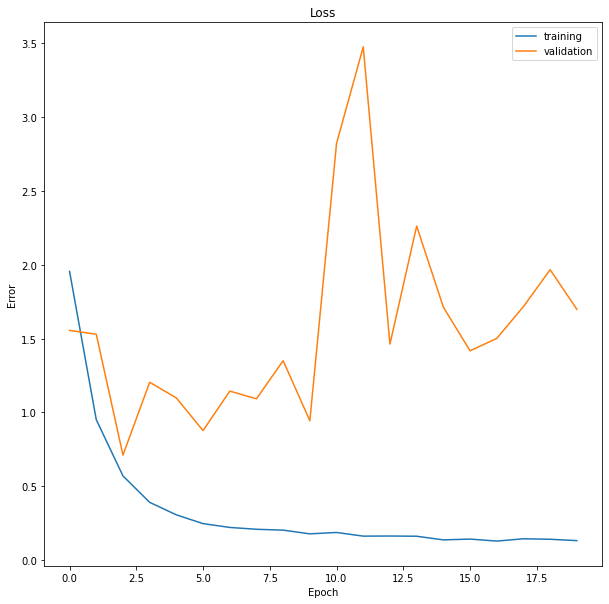

In [34]:
figure = plt.figure(figsize=(10, 10))
plt.title("Loss")
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()